In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [5]:
# Ruta de las carpetas de entrenamiento y prueba
train_folder = r"C:\Users\djbyr\Downloads\CarneDataset\train"
test_folder = r"C:\Users\djbyr\Downloads\CarneDataset\test"


In [6]:
# Tamaño de las imágenes
img_width, img_height = 150, 150

In [7]:
# Preprocesamiento de imágenes y generación de datos de entrenamiento y prueba
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [8]:
# Construcción del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/10
51/51 [==============================] - 26s 500ms/step - loss: 1.4047 - accuracy: 0.5703 - val_loss: 1.0884 - val_accuracy: 0.6538
Epoch 2/10
51/51 [==============================] - 25s 492ms/step - loss: 0.7800 - accuracy: 0.7196 - val_loss: 0.6940 - val_accuracy: 0.7462
Epoch 3/10
51/51 [==============================] - 25s 491ms/step - loss: 0.5636 - accuracy: 0.8195 - val_loss: 0.7228 - val_accuracy: 0.7538
Epoch 4/10
51/51 [==============================] - 25s 491ms/step - loss: 0.4992 - accuracy: 0.8289 - val_loss: 0.6983 - val_accuracy: 0.7412
Epoch 5/10
51/51 [==============================] - 25s 487ms/step - loss: 0.3103 - accuracy: 0.8976 - val_loss: 0.6342 - val_accuracy: 0.8025
Epoch 6/10
51/51 [==============================] - 25s 492ms/step - loss: 0.2052 - accuracy: 0.9307 - val_loss: 0.4756 - val_accuracy: 0.8712
Epoch 7/10
51/51 [==============================] - 25s 493ms/step - loss: 0.1827 - accuracy: 0.9382 - val_loss: 0.4592 - val_accuracy: 0.8838

In [10]:
# Evaluación del modelo
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

26/26 [==============================] - 4s 157ms/step - loss: 0.4794 - accuracy: 0.9000
Loss: 0.4793689250946045
Accuracy: 0.8999999761581421


In [11]:
# Matriz de confusión
class_names = list(train_generator.class_indices.keys())

predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)


26/26 [==============================] - 4s 156ms/step


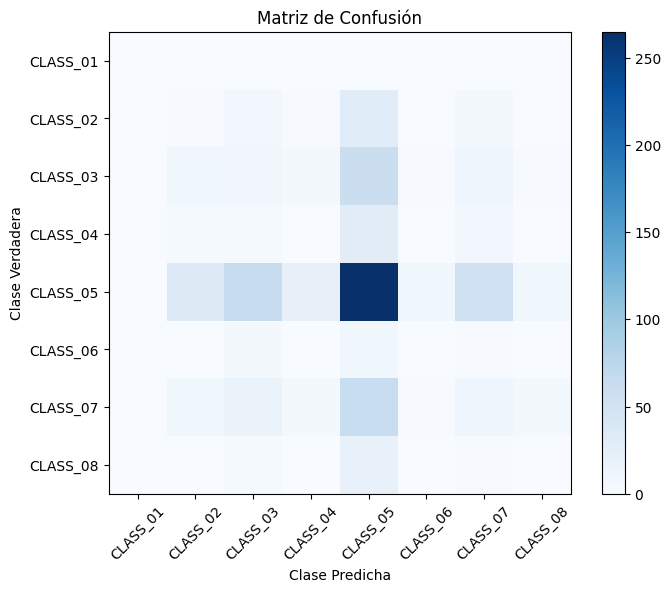

In [12]:
# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()